In [ ]:
# Selected 9AM due to high activity in this time zone (heatmap in official paper)

In [14]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [15]:
def count_blocks(data):
    block_counter_dict = {}
    for row in data.itertuples():

        # taking block size = 4KB
        block_index = int(row.Offset / 4096)

        # using offset iterate over the next blocks
        next_blocks_count = int(row.Size / 4096)

        # Incrememnt next blocks counter
        for i in range(0, next_blocks_count):

            if (block_index+i in block_counter_dict):
                block_counter_dict[block_index+i] += 1
            else:
                block_counter_dict[block_index+i] = 1
    return block_counter_dict


In [16]:
def ecdf(data, len_block_counter_dict):
    """ Compute ECDF """
#     x = np.sort(data)
    n = len(data)
#     y = np.arange(1, data) / n

    cumsum = 0
    y = []
    for i in range(len(data)):
        cumsum += data[i]
        y.append(round(cumsum/len_block_counter_dict, 3))

    return y


# 9AM VDI Trace (LUN0)

In [6]:

import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('2016022709-LUN0.csv')
data.head()
# data.shape

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456531e+09,0.005277,R,0,2423541584896,4096
1,1.456531e+09,0.006068,R,0,2429405498368,4096
2,1.456531e+09,0.000181,W,0,1867762091008,4096
3,1.456531e+09,0.009439,R,0,2424747143680,69632
4,1.456531e+09,0.009122,R,0,2423693551104,4096


In [7]:
# PART 1 - All Access

block_counter_dict = count_blocks(data)

print ("Number of blocks accessed", len(block_counter_dict))
print ("Sum of all the block accesses", sum(block_counter_dict.values()))
# print (block_counter_dict)


# for key in sorted(block_counter_dict):
#     print ("%s: %s" % (key, block_counter_dict[key]))

sorted_block_counter_dict = collections.OrderedDict(sorted(block_counter_dict.items()))
# print(sorted_block_counter_dict)

# print(sorted(block_counter_dict.values(), reverse=True))

Number of blocks accessed 16548267
Sum of all the block accesses 19883052


In [8]:
# df = pd.DataFrame(sorted_block_counter_dict, index=[1])
# df = pd.DataFrame.from_dict(sorted_block_counter_dict.items(), orient='index')
sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict, orient='index')

print(sorted_df)

            0
33049       1
36589       2
36590       2
37053       2
37054       2
...        ..
1241822059  1
1241822060  1
1241823153  1
1241823154  1
1241823155  1

[16548267 rows x 1 columns]


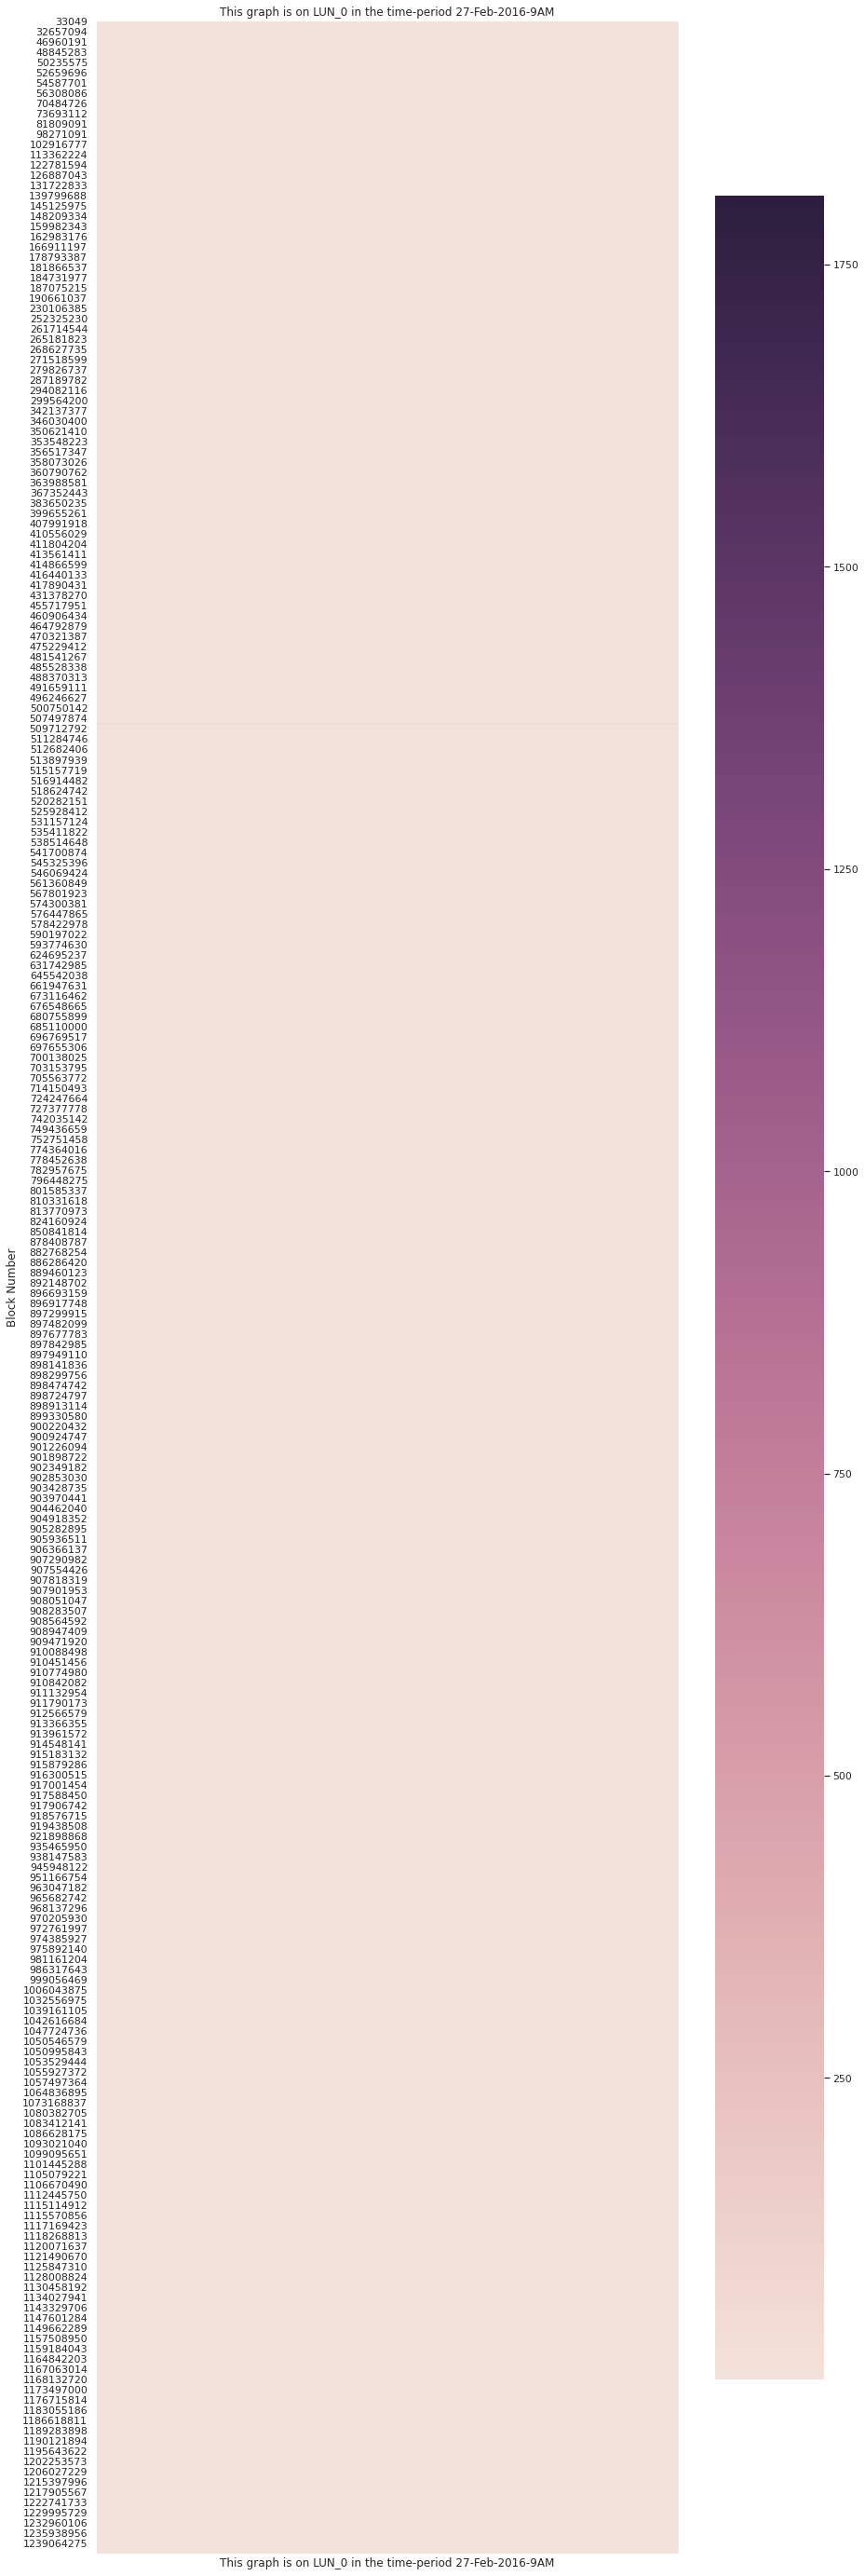

In [10]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_0 in the time-period 27-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_0 in the time-period 27-Feb-2016-9AM')
plt.show()

In [11]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

#98.66


block_range_2000_plus 0
block_range_1000_2000 6
block_range_500_1000 29
block_range_100_500 605
block_range_50_100 3166
block_range_10_50 3804
block_range_2_10 2448118
block_range_1 14092539
block_range_0 1225274888


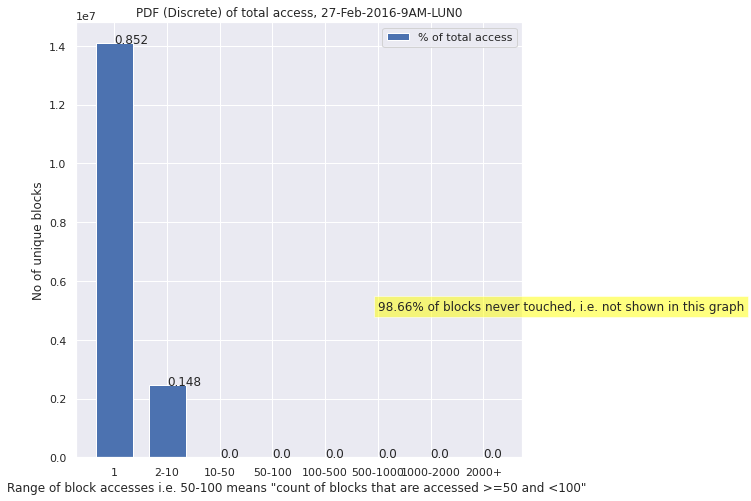

In [12]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access, 27-Feb-2016-9AM-LUN0")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 5000000, "98.66% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict), 3)), xy=(x_axis[i], y_axis[i]))



Text(4, 0.9, '98.66% of blocks never touched, i.e. not shown in this graph')

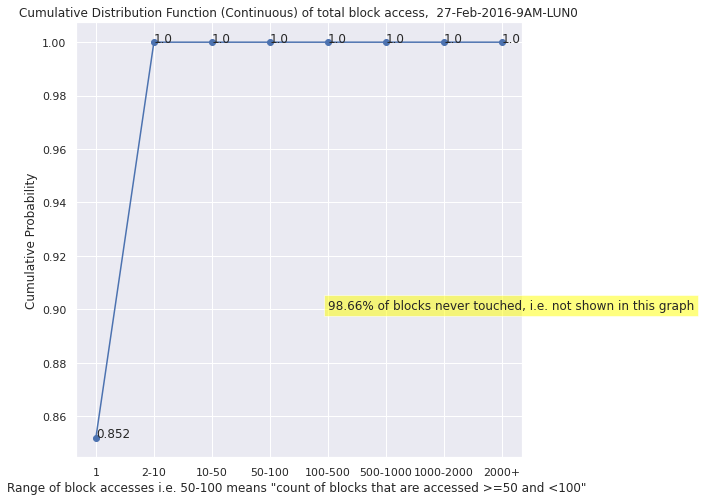

In [13]:

import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict))




pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access,  27-Feb-2016-9AM-LUN0")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "98.66% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))




# 9AM VDI Trace (LUN1)

In [17]:

import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('2016022709-LUN1.csv')
data.head()
# data.shape

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456531e+09,0.000134,W,1,992351481856,4096
1,1.456531e+09,0.000222,W,1,1637200947712,28672
2,1.456531e+09,0.000139,W,1,1637161579520,4096
3,1.456531e+09,0.000134,W,1,1637161575424,4096
4,1.456531e+09,0.000118,W,1,976111875072,4096


In [18]:
# PART 1 - All Access

block_counter_dict_2 = count_blocks(data)

print ("Number of blocks accessed", len(block_counter_dict_2))
print ("Sum of all the block accesses", sum(block_counter_dict_2.values()))

sorted_block_counter_dict_2 = collections.OrderedDict(sorted(block_counter_dict_2.items()))


Number of blocks accessed 13874466
Sum of all the block accesses 17078931


In [19]:

sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict_2, orient='index')

print(sorted_df)

            0
33049       4
478453      1
478454      1
478455      1
478456      1
...        ..
1158089277  1
1158317516  1
1158317517  1
1158317518  1
1158317519  1

[13874466 rows x 1 columns]


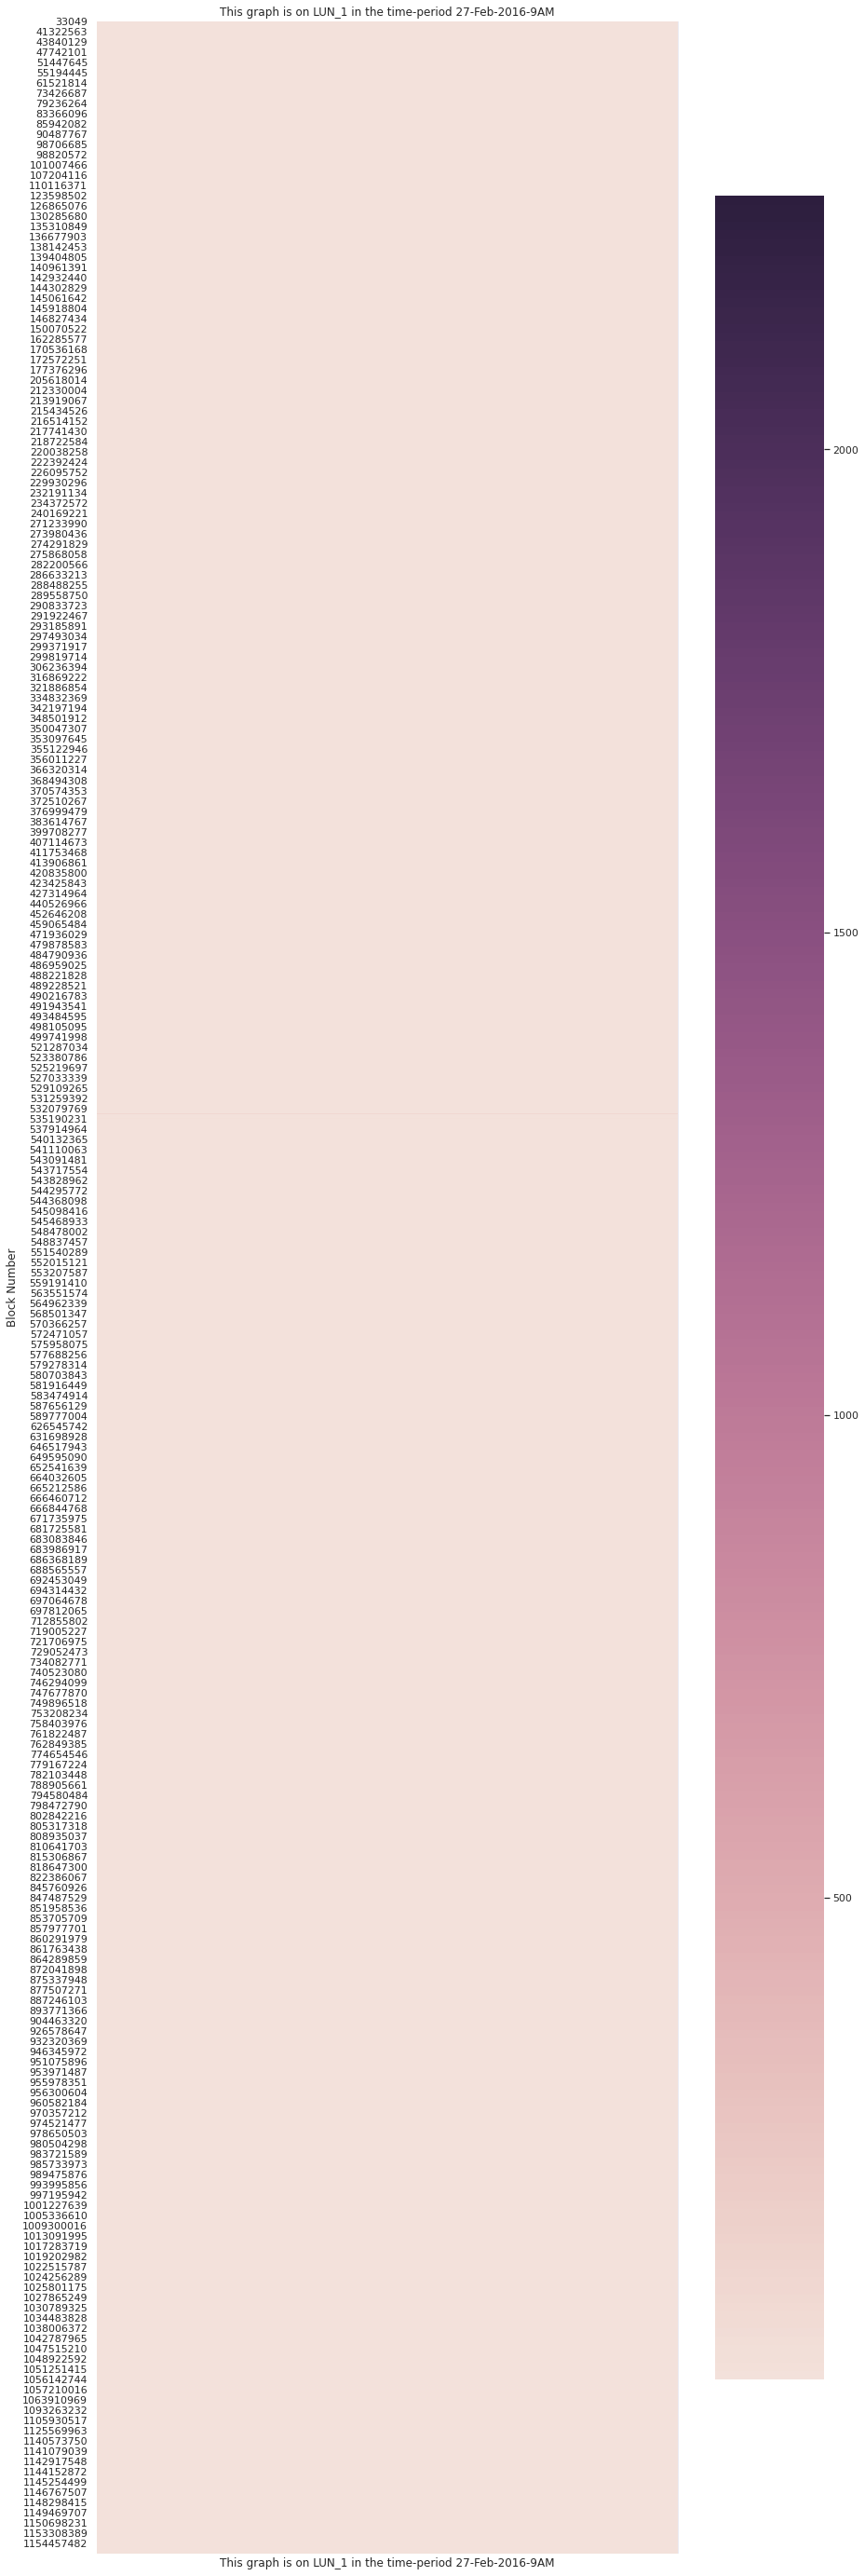

In [22]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_1 in the time-period 27-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_1 in the time-period 27-Feb-2016-9AM')
plt.show()

In [23]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_2.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_2)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_2)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

#98.802


block_range_2000_plus 2
block_range_1000_2000 3
block_range_500_1000 31
block_range_100_500 325
block_range_50_100 3123
block_range_10_50 4499
block_range_2_10 2197898
block_range_1 11668585
block_range_0 1144443053


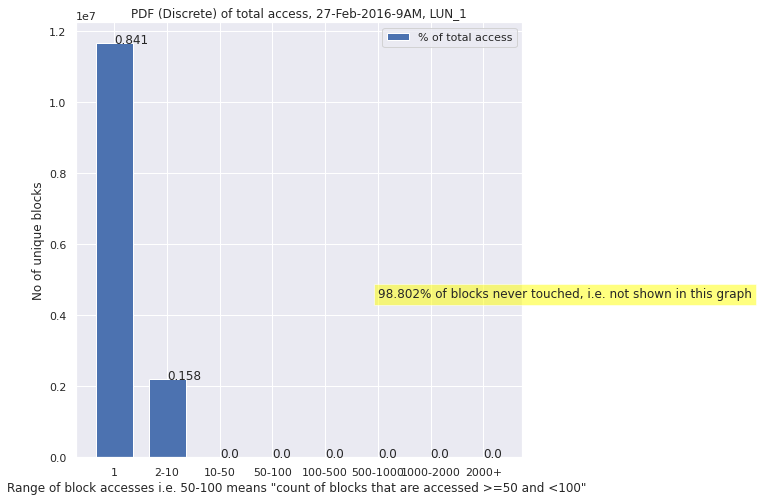

In [24]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access, 27-Feb-2016-9AM, LUN_1")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "98.802% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_2), 3)), xy=(x_axis[i], y_axis[i]))
   

Text(4, 0.9, '98.802% of blocks never touched, i.e. not shown in this graph')

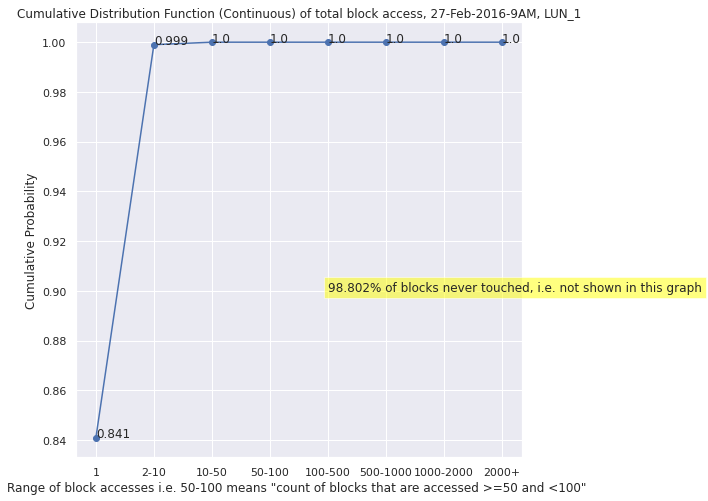

In [25]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_2))


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access, 27-Feb-2016-9AM, LUN_1")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "98.802% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))



# 9AM VDI Trace (LUN2)

In [29]:
import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('2016022709-LUN2.csv')
data.head()






# reaches block ~ 4.855 TB

# data.shape

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456531e+09,0.000125,W,2,4847594050560,512
1,1.456531e+09,0.000138,W,2,4835429135360,4096
2,1.456531e+09,0.000204,R,2,1357526192128,4096
3,1.456531e+09,0.000066,R,2,2236512905216,4096
4,1.456531e+09,0.006516,R,2,1471382415872,4096


In [30]:
# PART 1 - All Access

block_counter_dict_3 = count_blocks(data)

print ("Number of blocks accessed", len(block_counter_dict_3))
print ("Sum of all the block accesses", sum(block_counter_dict_3.values()))

sorted_block_counter_dict_3 = collections.OrderedDict(sorted(block_counter_dict_3.items()))


Number of blocks accessed 13123345
Sum of all the block accesses 16568954


In [31]:
sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict_3, orient='index')

print(sorted_df)

            0
33049       4
33050       1
33051       1
33052       1
33053       1
...        ..
1302701407  1
1302701408  1
1302701409  1
1302701410  1
1302701411  1

[13123345 rows x 1 columns]


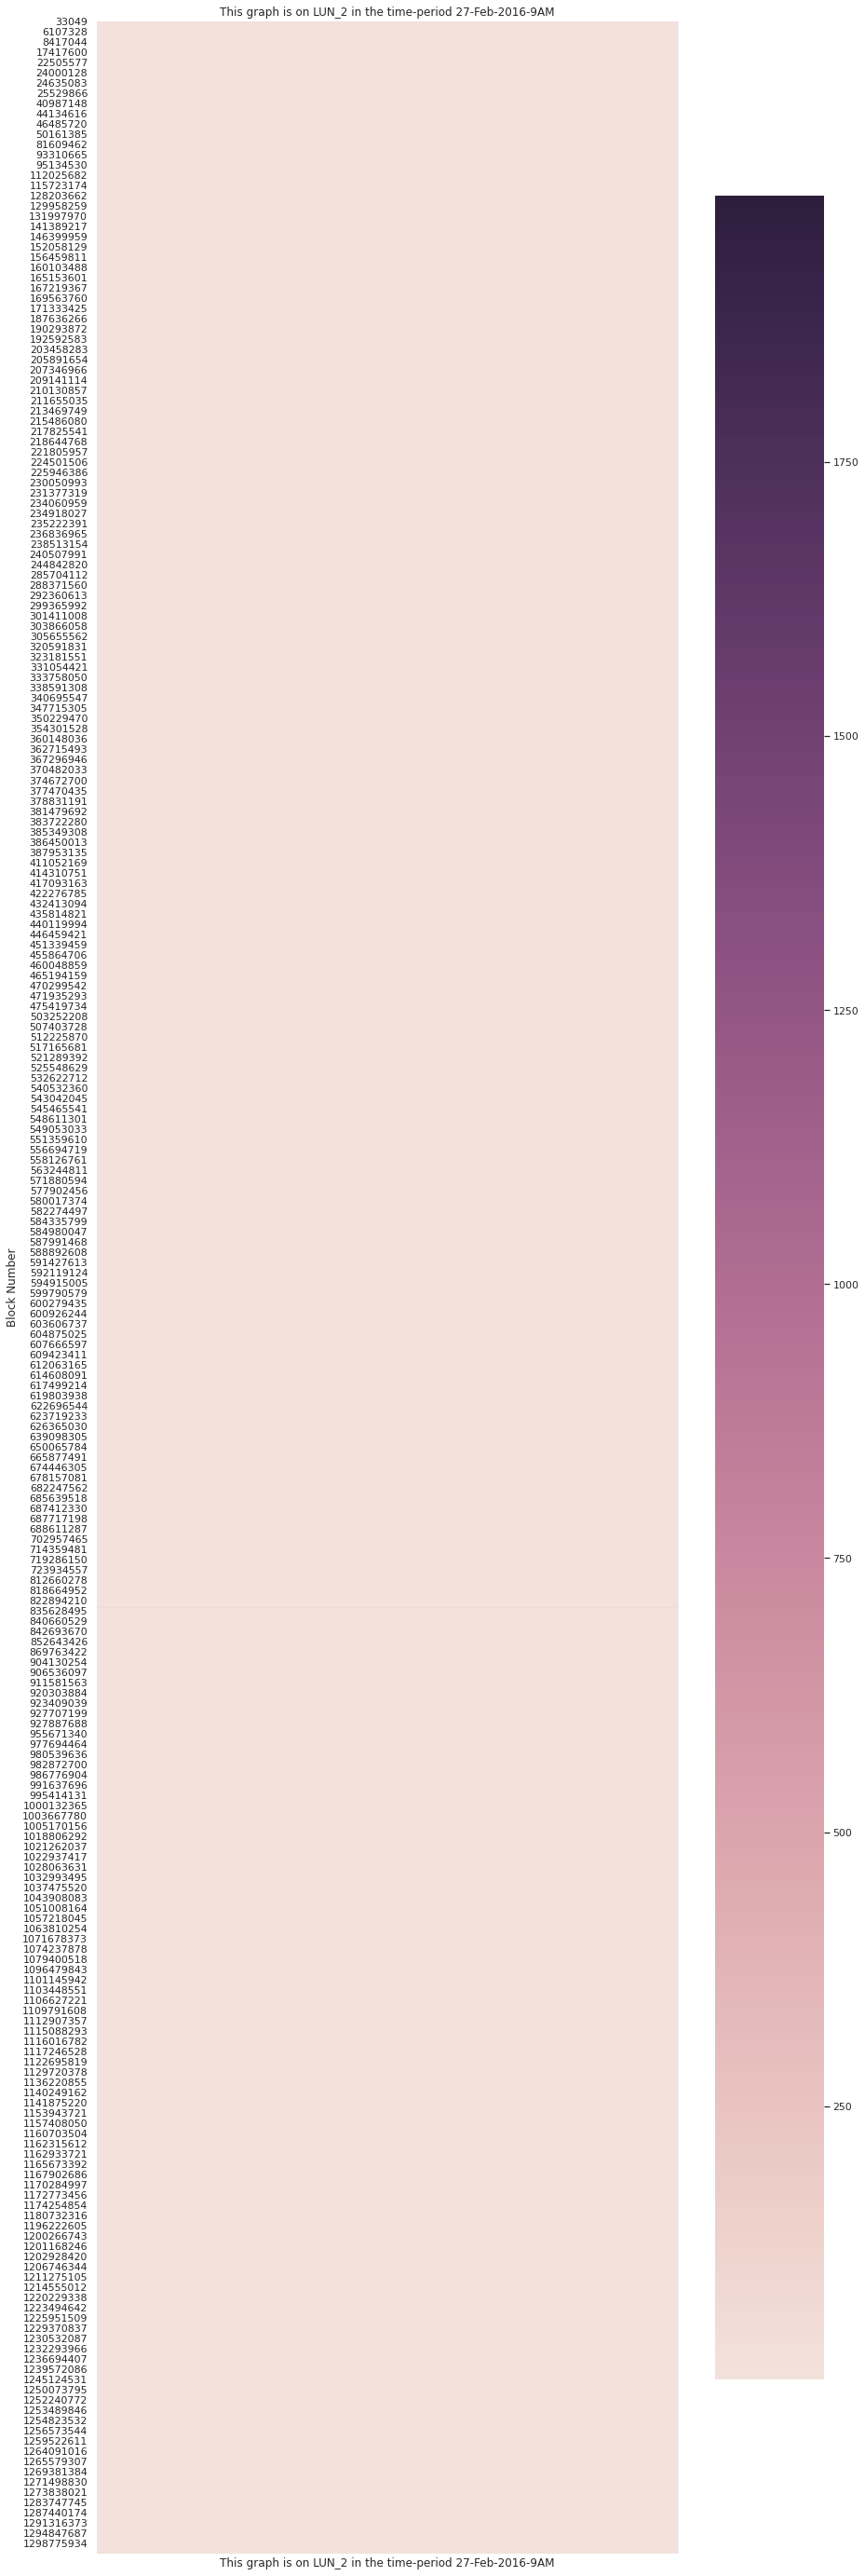

In [33]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_2 in the time-period 27-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_2 in the time-period 27-Feb-2016-9AM')
plt.show()

In [34]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_3.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_3)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_3)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)


#98.899

block_range_2000_plus 0
block_range_1000_2000 5
block_range_500_1000 22
block_range_100_500 341
block_range_50_100 3307
block_range_10_50 3522
block_range_2_10 2404088
block_range_1 10712060
block_range_0 1289578066


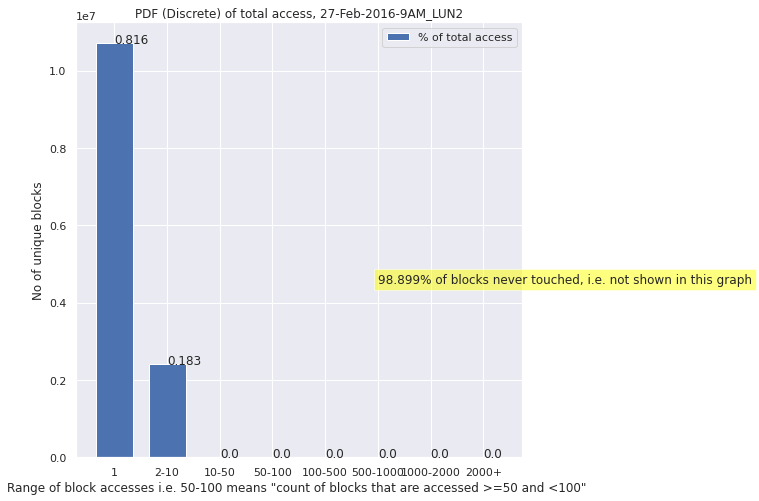

In [35]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access, 27-Feb-2016-9AM_LUN2")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "98.899% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_3), 3)), xy=(x_axis[i], y_axis[i]))
   

Text(4, 0.9, '98.899% of blocks never touched, i.e. not shown in this graph')

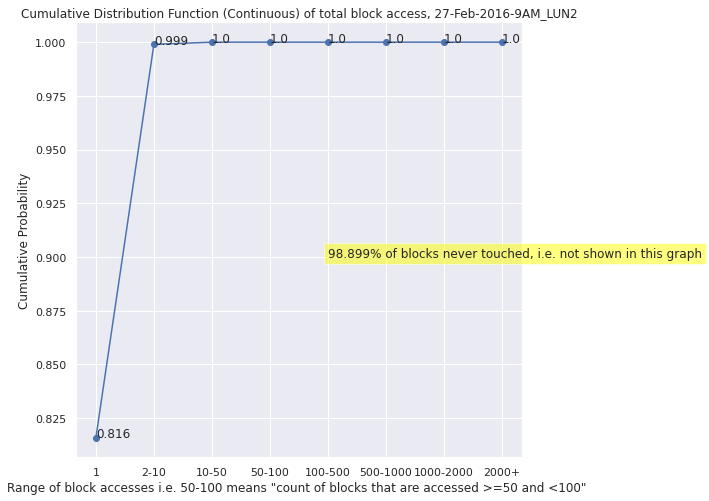

In [36]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_3))


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access, 27-Feb-2016-9AM_LUN2")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "98.899% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))


# 9AM VDI Trace (LUN3)

In [43]:
import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('2016022709-LUN3.csv')
data.head()
# data.shape

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456531e+09,0.003558,R,3,2546780115456,4096
1,1.456531e+09,0.000197,W,3,2220009219072,4096
2,1.456531e+09,0.000151,W,3,2223946784256,4096
3,1.456531e+09,0.000140,W,3,2217161299968,3584
4,1.456531e+09,0.000122,W,3,2210190021120,1024


In [44]:
# PART 1 - All Access

block_counter_dict_4 = count_blocks(data)

print ("Number of blocks accessed", len(block_counter_dict_4))
print ("Sum of all the block accesses", sum(block_counter_dict_4.values()))

sorted_block_counter_dict_4 = collections.OrderedDict(sorted(block_counter_dict_4.items()))


Number of blocks accessed 14399371
Sum of all the block accesses 18114436


In [45]:
sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict_4, orient='index')

print(sorted_df)

             0
33049        4
33120       61
33121       61
68551        1
68552        1
...         ..
1052849034   1
1052849035   1
1052849036   1
1052849037   1
1052849038   1

[14399371 rows x 1 columns]


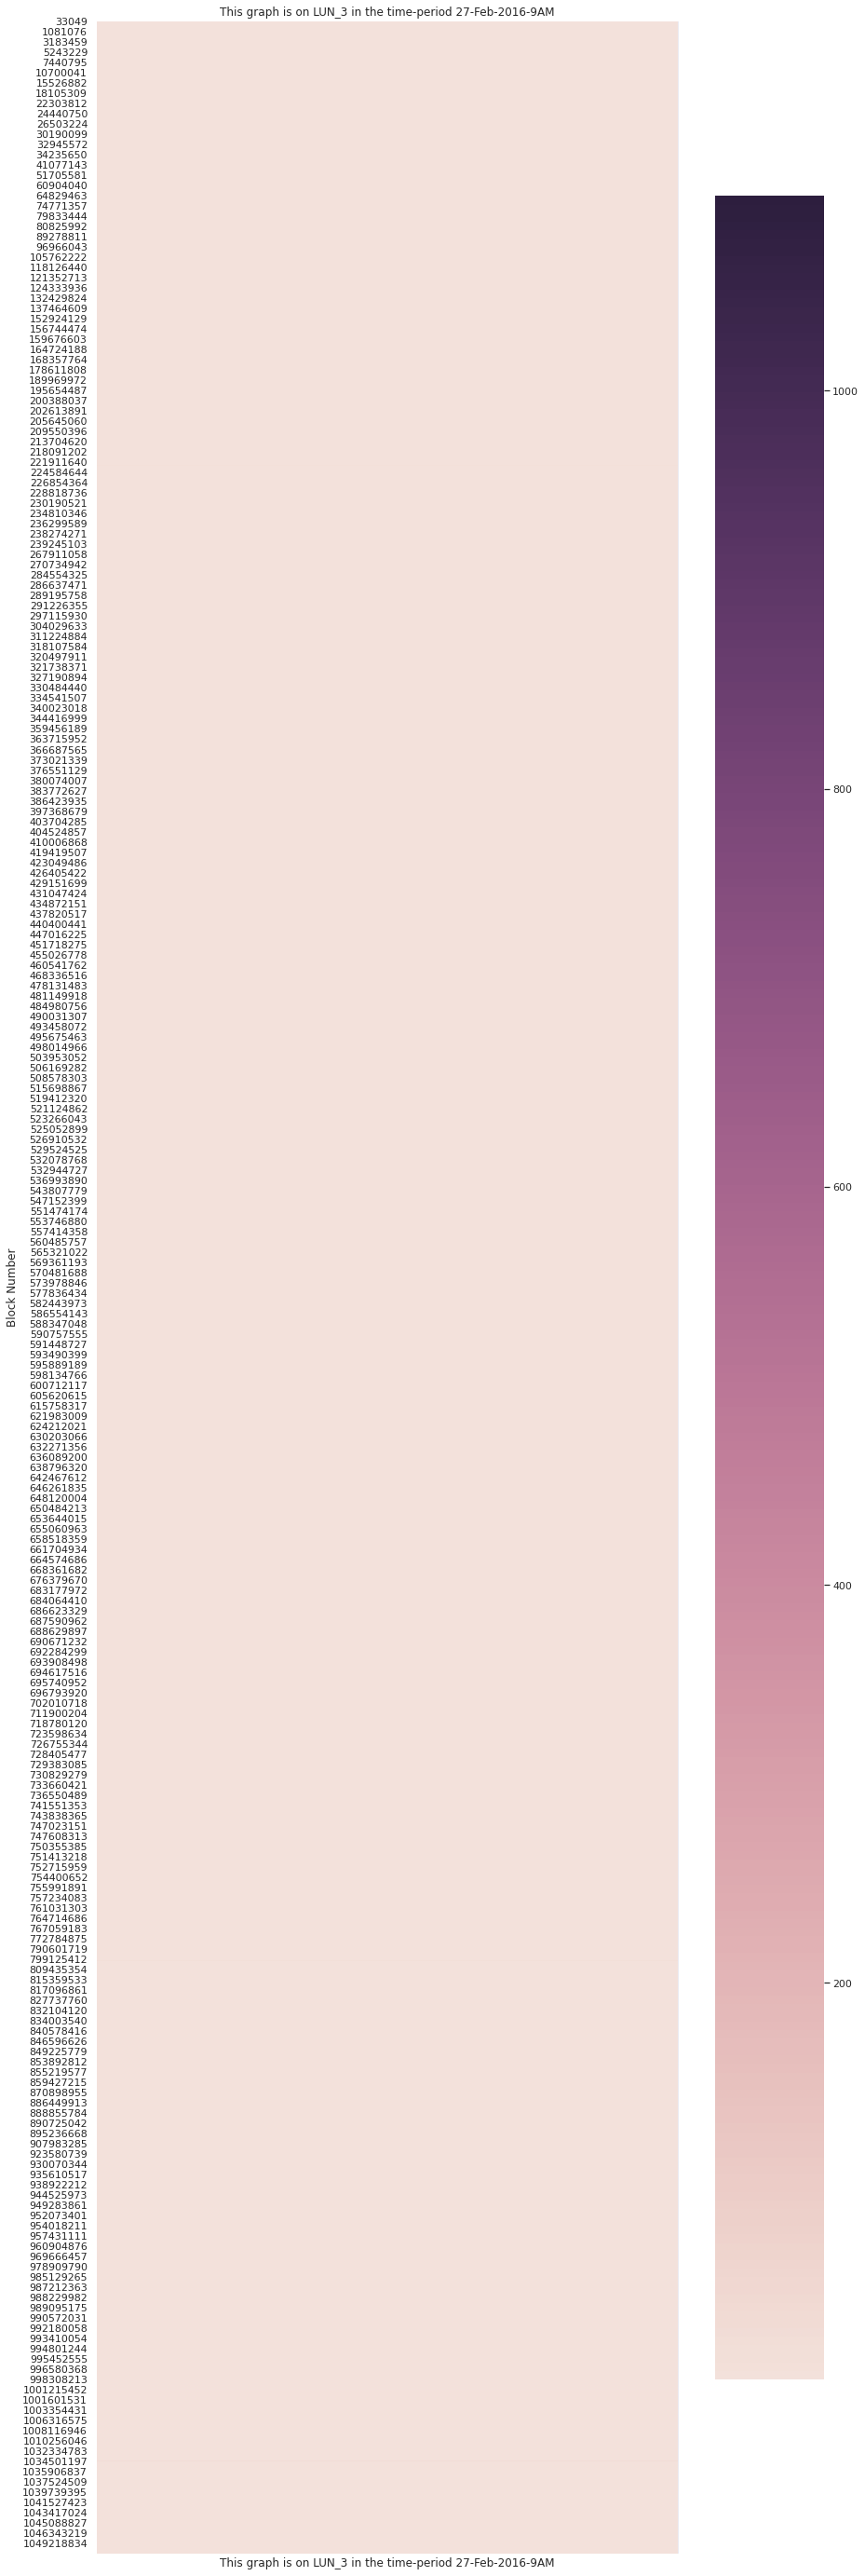

In [46]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_3 in the time-period 27-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_3 in the time-period 27-Feb-2016-9AM')
plt.show()

In [47]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_4.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_4)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_4)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

#98.632


block_range_2000_plus 0
block_range_1000_2000 4
block_range_500_1000 31
block_range_100_500 306
block_range_50_100 3093
block_range_10_50 3672
block_range_2_10 2840991
block_range_1 11551274
block_range_0 1038449667


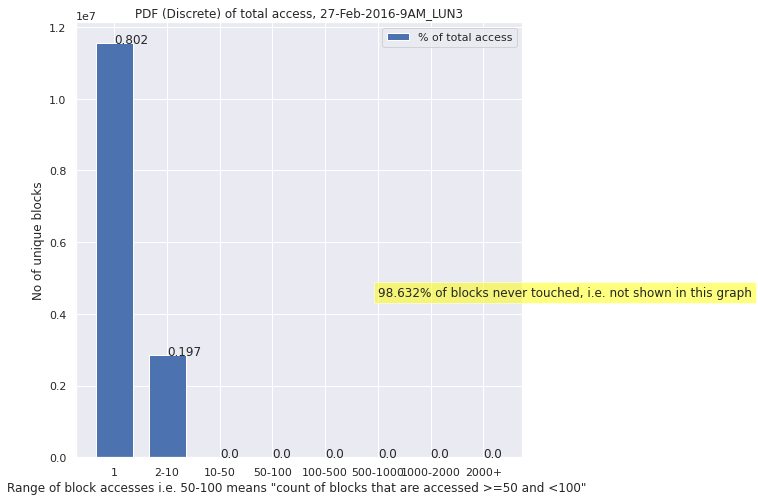

In [48]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access, 27-Feb-2016-9AM_LUN3")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "98.632% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_4), 3)), xy=(x_axis[i], y_axis[i]))
   

Text(4, 0.9, '98.632% of blocks never touched, i.e. not shown in this graph')

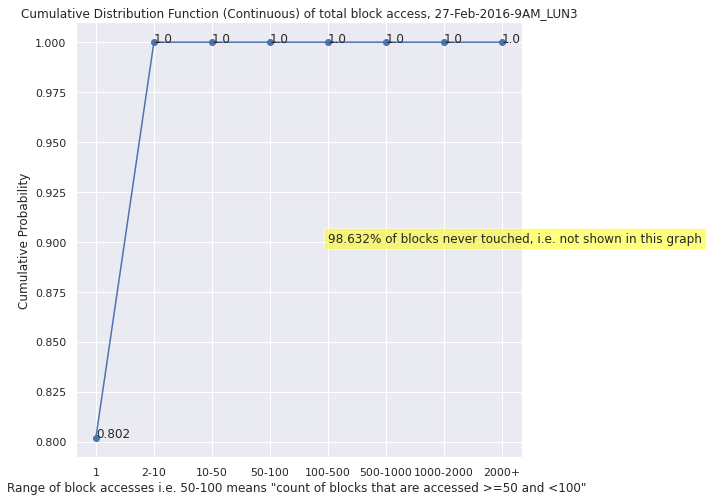

In [49]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_4))


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access, 27-Feb-2016-9AM_LUN3")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "98.632% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))


# 9AM VDI Trace (LUN4)

In [6]:
import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('2016022709-LUN4.csv')
data.head()
# data.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Timestamp,Response,IOType,LUN,Offset,Size
0,1456531200.079136000,0.000558,R,4,3528640445440,131072
1,1456531200.079985000,0.000170,R,4,360856971264,32768
2,1456531200.080446000,0.000170,R,4,360857004032,32768
3,1456531200.080837000,0.000170,R,4,360857036800,32768
4,1456531200.081304000,0.000170,R,4,360857069568,32768


In [7]:
block_counter_dict_5 = count_blocks(data)

print ("Number of blocks accessed", len(block_counter_dict_5))
print ("Sum of all the block accesses", sum(block_counter_dict_5.values()))

sorted_block_counter_dict_5 = collections.OrderedDict(sorted(block_counter_dict_5.items()))


Number of blocks accessed 13181335
Sum of all the block accesses 16272251


In [8]:
sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict_5, orient='index')

print(sorted_df)

           0
33049      3
56159      1
56160      1
56161      1
57650      1
...       ..
874242637  2
874242638  2
874242639  2
874242640  2
874242641  2

[13181335 rows x 1 columns]


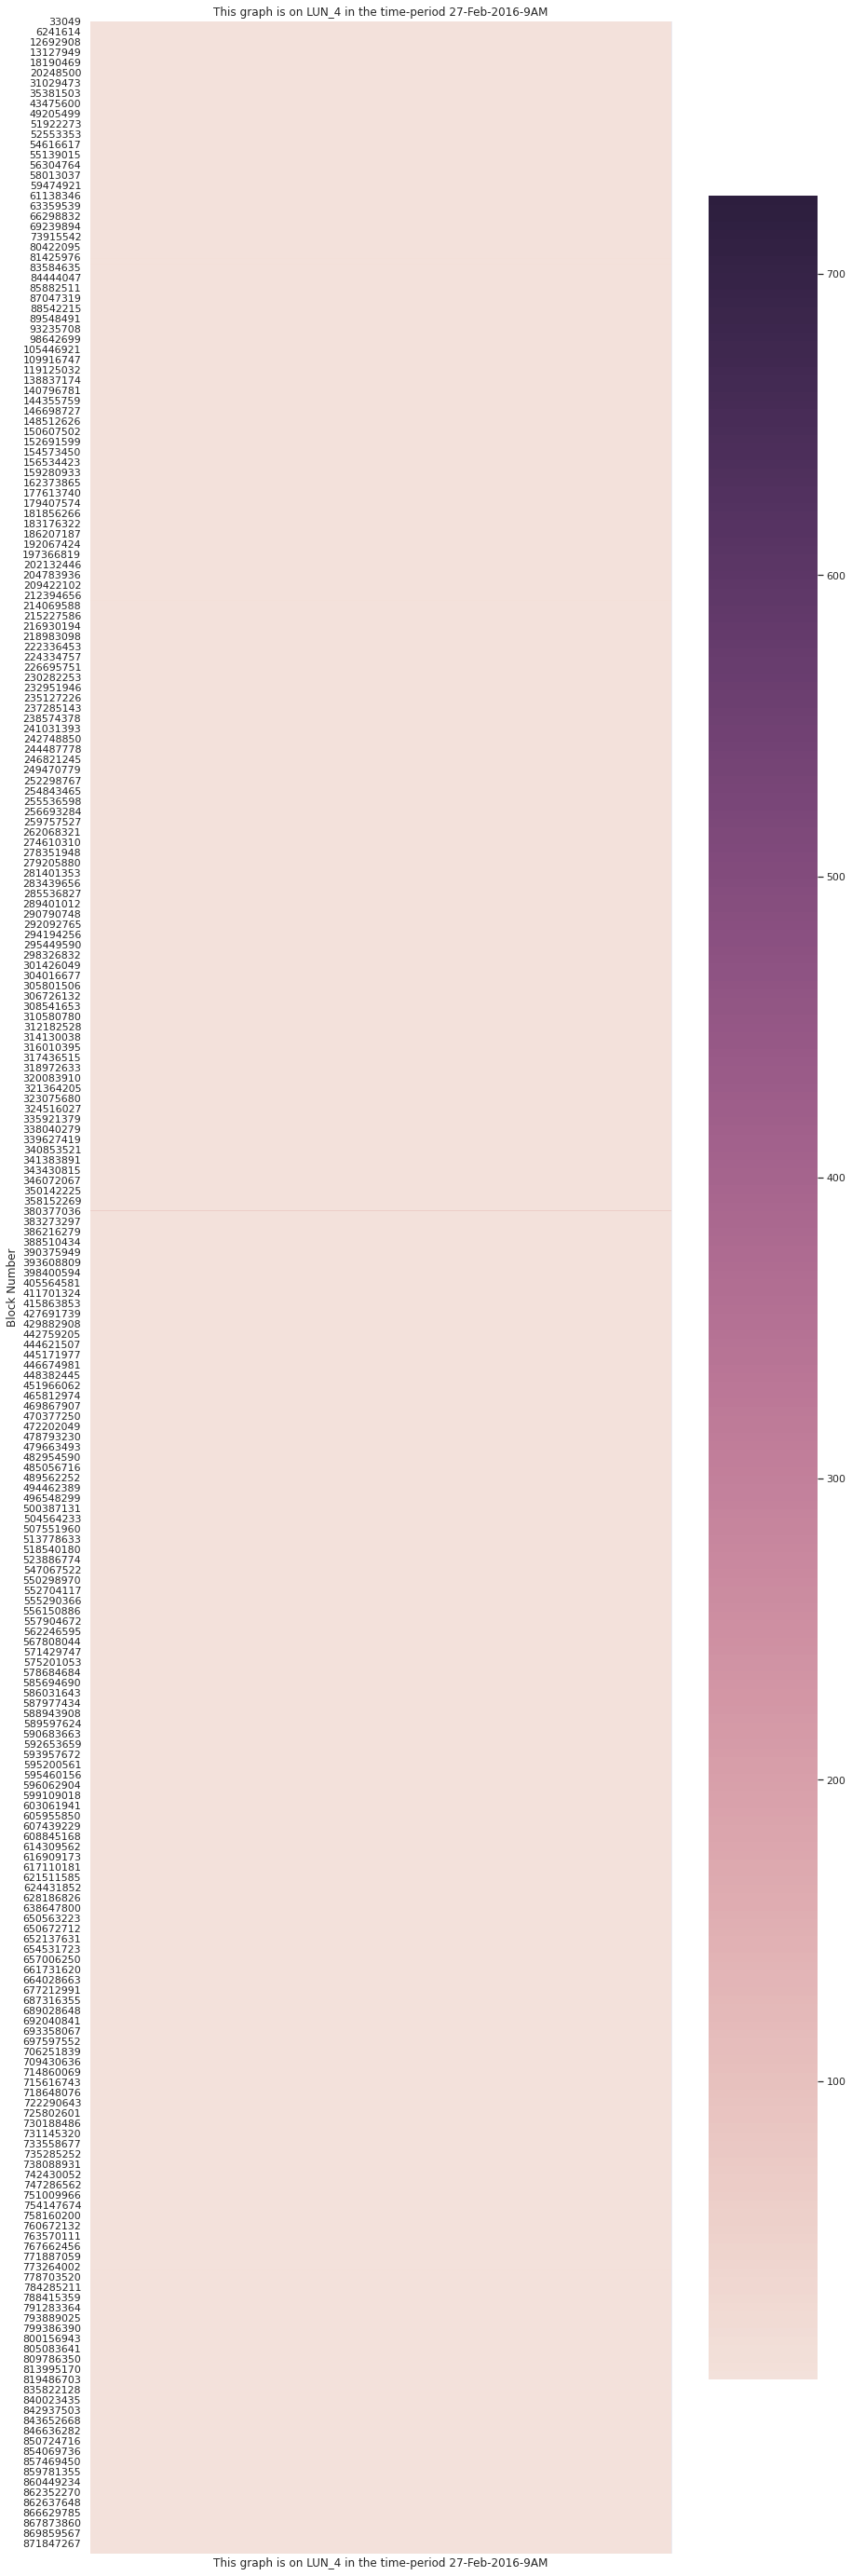

In [9]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_4 in the time-period 27-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_4 in the time-period 27-Feb-2016-9AM')
plt.show()

In [10]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_5.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_5)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_5)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

#98.492


block_range_2000_plus 0
block_range_1000_2000 0
block_range_500_1000 28
block_range_100_500 252
block_range_50_100 2788
block_range_10_50 3158
block_range_2_10 2238325
block_range_1 10936784
block_range_0 861061306


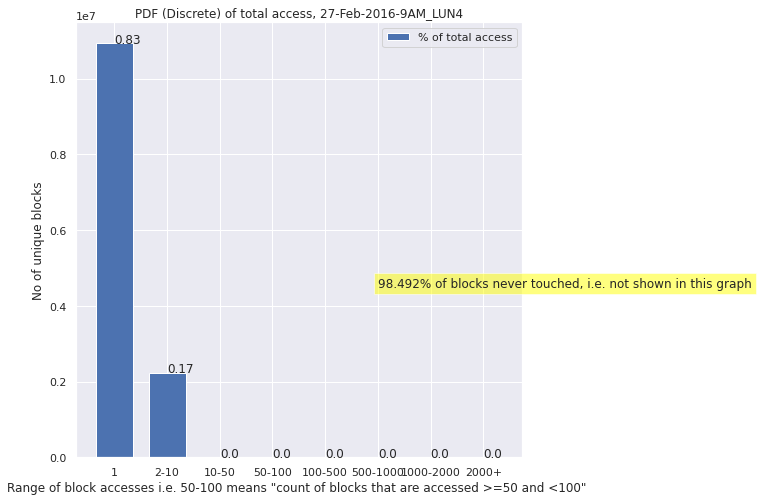

In [11]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access, 27-Feb-2016-9AM_LUN4")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "98.492% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_5), 3)), xy=(x_axis[i], y_axis[i]))
   

Text(4, 0.9, '98.492% of blocks never touched, i.e. not shown in this graph')

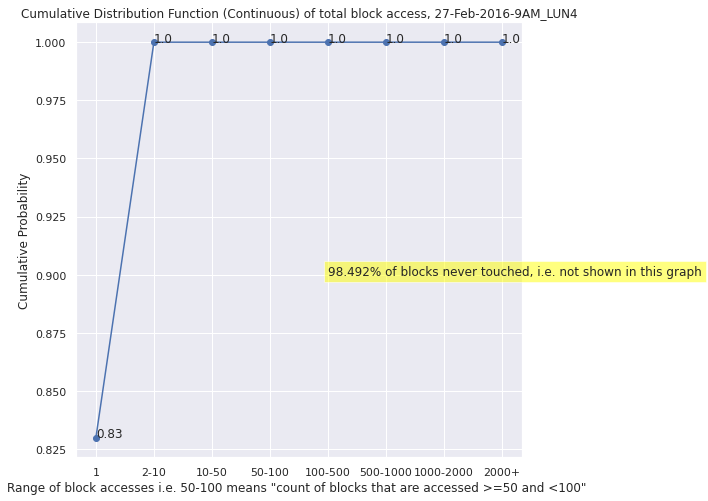

In [12]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_5))


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access, 27-Feb-2016-9AM_LUN4")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "98.492% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))


# 9AM VDI Trace (LUN6)

In [17]:
import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('2016022709-LUN6.csv')
data.head()
# data.shape

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456531e+09,0.000212,W,6,7222113792,4096
1,1.456531e+09,0.000200,W,6,7245753344,8192
2,1.456531e+09,0.000242,W,6,7221917184,24576
3,1.456531e+09,0.000216,W,6,71819547648,9216
4,1.456531e+09,0.000445,W,6,2916117465600,4096


In [18]:
block_counter_dict_6 = count_blocks(data)

print ("Number of blocks accessed", len(block_counter_dict_6))
print ("Sum of all the block accesses", sum(block_counter_dict_6.values()))

sorted_block_counter_dict_6 = collections.OrderedDict(sorted(block_counter_dict_6.items()))


Number of blocks accessed 17005792
Sum of all the block accesses 20839293


In [19]:
sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict_6, orient='index')

print(sorted_df)

            0
33048       5
33088      60
34514       1
34515       1
34516       1
...        ..
902982428   2
902982429   2
902982430   2
903004119   1
903004120   1

[17005792 rows x 1 columns]


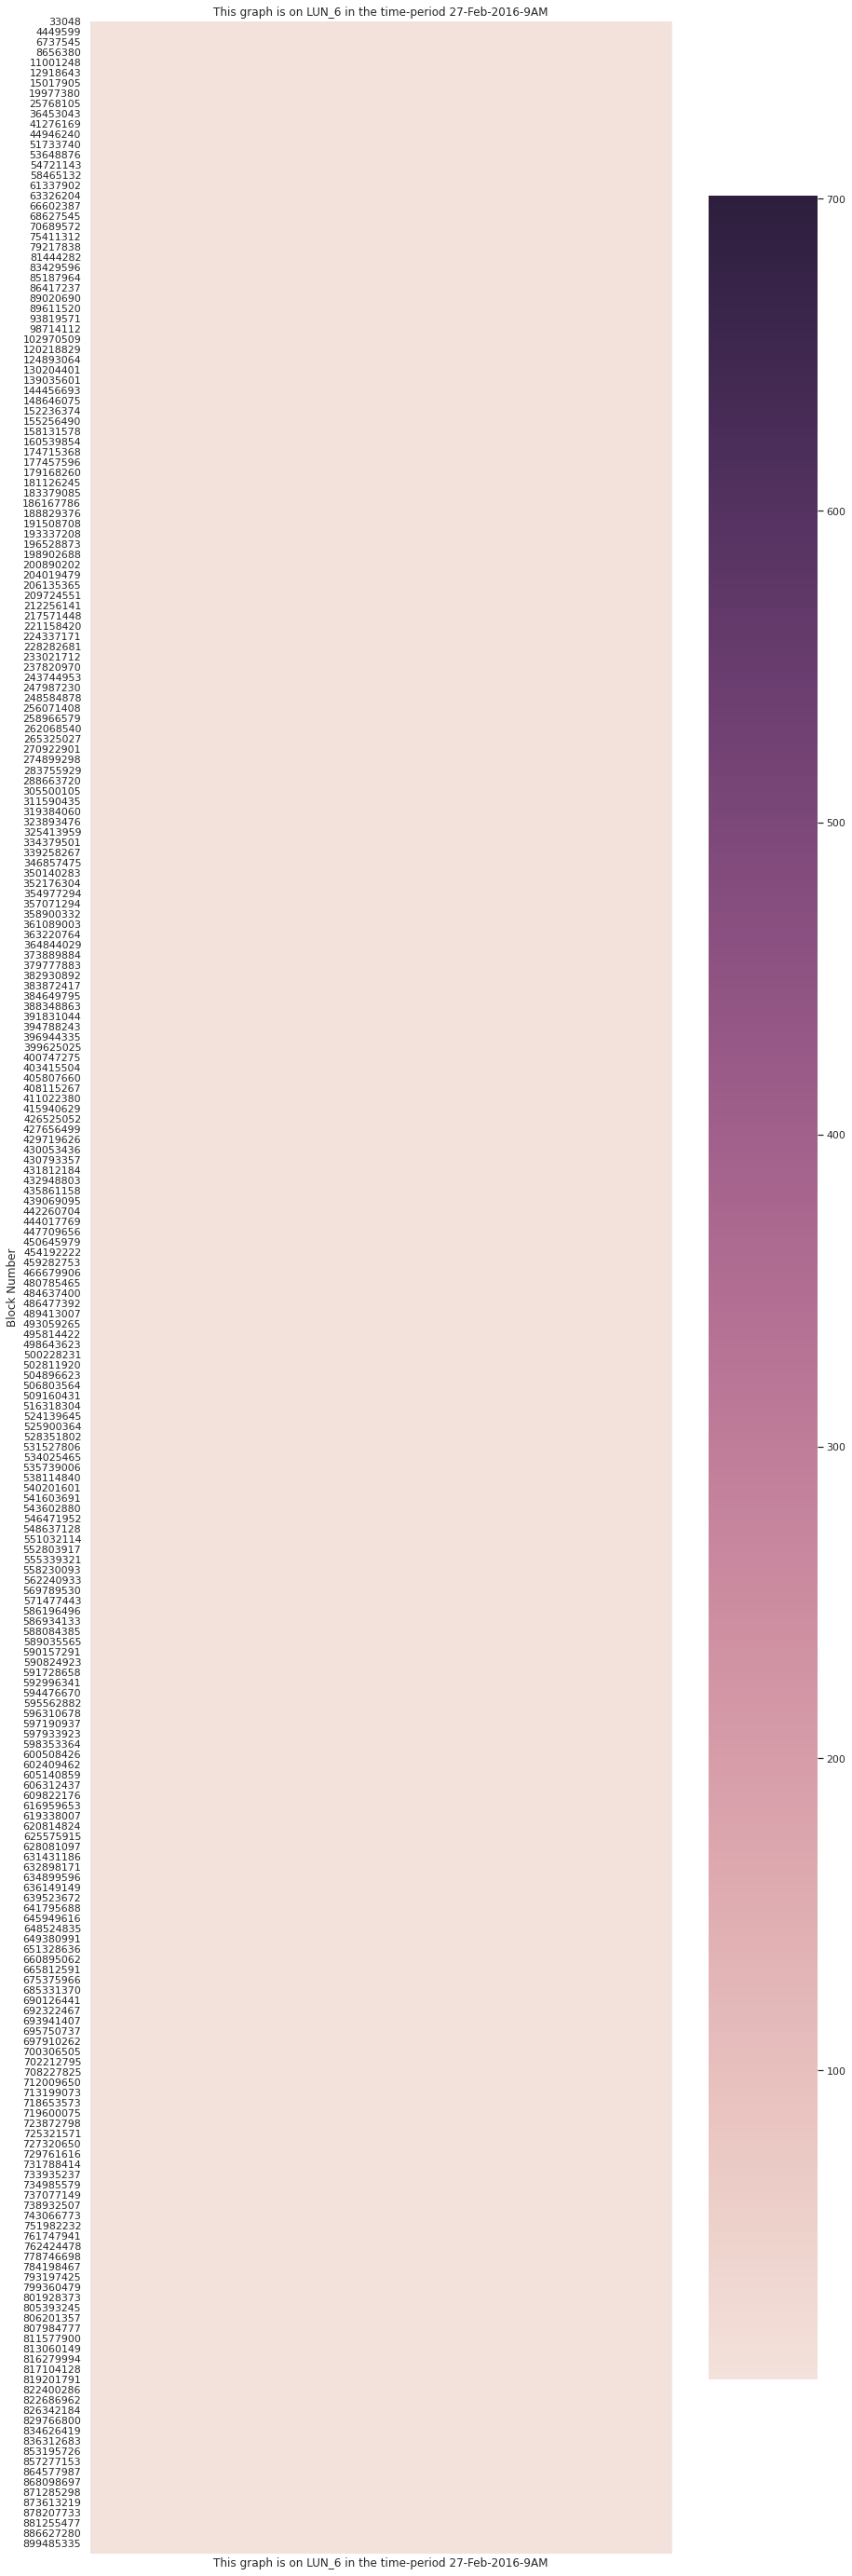

In [20]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_6 in the time-period 27-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_6 in the time-period 27-Feb-2016-9AM')
plt.show()

In [21]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_6.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_6)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_6)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

#98.116

block_range_2000_plus 0
block_range_1000_2000 0
block_range_500_1000 26
block_range_100_500 306
block_range_50_100 2943
block_range_10_50 3774
block_range_2_10 2921462
block_range_1 14077281
block_range_0 885998328


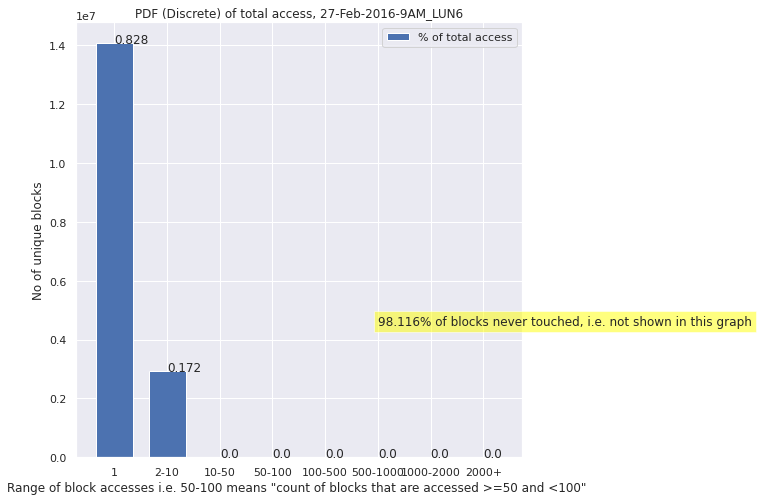

In [22]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access, 27-Feb-2016-9AM_LUN6")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "98.116% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_6), 3)), xy=(x_axis[i], y_axis[i]))


Text(4, 0.9, '98.116% of blocks never touched, i.e. not shown in this graph')

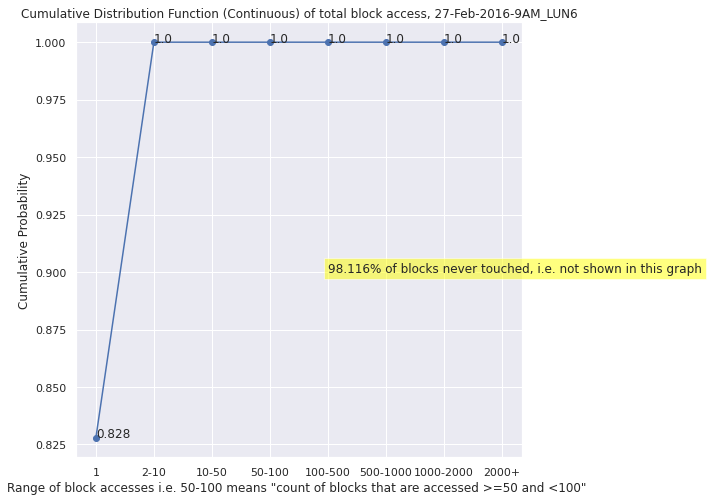

In [23]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_6))


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access, 27-Feb-2016-9AM_LUN6")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "98.116% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))
